In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import pickle

df_train = pickle.load(open("../train_pickle.pkl", "rb"))

In [3]:
df_test = pickle.load(open("../test_pickle.pkl", "rb"))

In [ ]:
df_train.memory_usage(index=True).sum()/ 1024**2

In [43]:
df_items = pd.read_csv("items.csv")
print(df_items.shape)
print(df_items.head())
# print(df_items.groupby("perishable").count())
# print(df_items.groupby("family").count())
# print(df_items.groupby("class").count())


FileNotFoundError: File b'items.csv' does not exist

In [44]:
df_stores = pd.read_csv("stores.csv")

FileNotFoundError: File b'stores.csv' does not exist

In [45]:
df_train[df_train["Year"] >= 16]["unit_sales"].mean()

6.299663066864014

In [46]:
df_test[~df_test['item_nbr'].isin(df_train['item_nbr'].unique())]["item_nbr"].unique().size

3901

In [47]:
df_train['item_nbr']

0               4
1               5
2               6
3              13
4              17
5              18
6              19
7              23
8              25
9              28
10             30
11             31
12             32
13             33
14             34
15             36
16             37
17             38
18             40
19             46
20             47
21             48
22             49
23             52
24             61
25             67
26             71
27             72
28             73
29             79
             ... 
125497010    3919
125497011    3925
125497012    3928
125497013    3933
125497014    3934
125497015    3936
125497016    3937
125497017    3938
125497018    3939
125497019    3940
125497020    3941
125497021    3944
125497022    3946
125497023    3948
125497024    3957
125497025    3958
125497026    3959
125497027    3962
125497028    3966
125497029    3967
125497030    3969
125497031    3971
125497032    3975
125497033    3977
125497034 

In [48]:
df_train.loc[(df_train["item_nbr"] == 96995) & (df_train["store_nbr"] == 44)]

,store_nbr,item_nbr,unit_sales,onpromotion,Year,Month,Day,Weekday


In [ ]:
# There are 54 stores - not that many, perhaps one-hot able? or simply handle as categorical
df_stores.shape

In [15]:
from catboost import CatBoostRegressor

In [16]:
model = CatBoostRegressor(
        depth=6, 
        l2_leaf_reg=3, 
        learning_rate=0.1,
        iterations=300,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=1337)

In [17]:
df_train_mini = df_train.sample(frac=.1)

model.fit(
        df_train_mini.drop(['unit_sales'], axis=1), df_train_mini[["unit_sales"]],
        verbose = True)

Borders for float features generated
0:	learn 25.65644613	total: 3.31s	remaining: 16m 28s
1:	learn 25.39441525	total: 6.51s	remaining: 16m 10s
2:	learn 25.178733	total: 9.82s	remaining: 16m 12s
3:	learn 25.0041215	total: 13.3s	remaining: 16m 21s
4:	learn 24.86051157	total: 16.5s	remaining: 16m 13s
5:	learn 24.74345405	total: 19.7s	remaining: 16m 6s
6:	learn 24.64654029	total: 22.8s	remaining: 15m 55s
7:	learn 24.5658728	total: 26.2s	remaining: 15m 54s
8:	learn 24.50003148	total: 29.5s	remaining: 15m 53s
9:	learn 24.4459595	total: 32.8s	remaining: 15m 52s
10:	learn 24.39982898	total: 35.9s	remaining: 15m 42s
11:	learn 24.3634567	total: 39.2s	remaining: 15m 40s
12:	learn 24.33185183	total: 42.4s	remaining: 15m 36s
13:	learn 24.30795836	total: 45.7s	remaining: 15m 34s
14:	learn 24.28253208	total: 48.9s	remaining: 15m 28s
15:	learn 24.2645743	total: 51.9s	remaining: 15m 20s
16:	learn 24.25019738	total: 55.2s	remaining: 15m 18s
17:	learn 24.23829582	total: 58.6s	remaining: 15m 17s
18:	learn

151:	learn 24.00967272	total: 6m 21s	remaining: 6m 11s
152:	learn 24.00904933	total: 6m 23s	remaining: 6m 8s
153:	learn 24.00864525	total: 6m 26s	remaining: 6m 6s
154:	learn 24.00839541	total: 6m 28s	remaining: 6m 3s
155:	learn 24.00559471	total: 6m 30s	remaining: 6m
156:	learn 24.00522718	total: 6m 33s	remaining: 5m 58s
157:	learn 24.00418576	total: 6m 35s	remaining: 5m 55s
158:	learn 24.00326376	total: 6m 37s	remaining: 5m 52s
159:	learn 24.00277738	total: 6m 39s	remaining: 5m 49s
160:	learn 24.00178601	total: 6m 42s	remaining: 5m 47s
161:	learn 24.00089797	total: 6m 44s	remaining: 5m 44s
162:	learn 23.99998989	total: 6m 46s	remaining: 5m 41s
163:	learn 23.99917327	total: 6m 48s	remaining: 5m 39s
164:	learn 23.99853075	total: 6m 51s	remaining: 5m 36s
165:	learn 23.99793244	total: 6m 53s	remaining: 5m 33s
166:	learn 23.99745161	total: 6m 55s	remaining: 5m 31s
167:	learn 23.99717605	total: 6m 58s	remaining: 5m 28s
168:	learn 23.99634926	total: 7m	remaining: 5m 26s
169:	learn 23.9957074

In [18]:
result = model.predict(df_test)

In [49]:
sales = df_train.set_index(['Year', "Month"]).sort_index().groupby(level=[0,1])["unit_sales"].sum()

MemoryError: 

In [ ]:
import matplotlib.pyplot as plt
sales.plot()
plt.show()

In [ ]:
sales.rolling(window=30, center=False).plot()
plt.show()

In [1]:
# df_train[(df_train["item_nbr"] == 103665) & (df_train["store_nbr"] == 1) & (df_train["Year"] == 2017)]

In [4]:
dtype_dict={"id":np.uint32,
            "store_nbr":np.uint8,
            "item_nbr":np.uint32,
            "unit_sales":np.float32
           }

In [15]:
train_part2=pd.read_csv("../csv/train.csv",dtype=dtype_dict,usecols=[1, 4, 5],parse_dates=[0])

/home/joseph/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
train_part1 = pd.read_csv("../csv/train.csv",dtype=dtype_dict,usecols=[3])

In [22]:
train = pd.concat([train_part1.reset_index(drop=True), train_part2], axis=1)
del(train_part1)
del(train_part2)

In [16]:
train_part2.head()

,date,unit_sales,onpromotion
0,2013-01-01,7.0,NaN
1,2013-01-01,1.0,NaN
2,2013-01-01,2.0,NaN
3,2013-01-01,1.0,NaN
4,2013-01-01,1.0,NaN


In [17]:
train = train_part2[train_part2["date"] > "2015-12-31"]

In [7]:
train["unit_sales"].mean()

6.299663066864014

In [8]:
holiday = pd.read_csv('../csv/holidays_events.csv', parse_dates=['date'])
holiday = holiday.loc[holiday['transferred'] == False]
holiday = holiday.loc[holiday['type'] != 'Work Day']

In [14]:
train[train["date"].isin(holiday["date"])].mean()

unit_sales    8.589411
dtype: float32

In [19]:
train[train["onpromotion"] == True]["unit_sales"].mean()

12.861695289611816

In [40]:
first_dates = train.groupby(["item_nbr"]).first()

In [21]:
fd = first_dates.reset_index(drop=True)
print(fd)

           date
0    2013-01-06
1    2014-08-17
2    2013-01-02
3    2013-01-02
4    2013-01-01
5    2013-01-01
6    2013-01-01
7    2013-01-02
8    2013-01-02
9    2013-01-02
10   2013-01-02
11   2013-01-02
12   2013-01-02
13   2013-01-01
14   2013-09-26
15   2013-01-02
16   2013-01-02
17   2013-01-01
18   2013-01-01
19   2013-01-01
20   2013-01-02
21   2013-01-02
22   2013-01-02
23   2013-01-01
24   2013-01-02
25   2013-01-01
26   2013-01-02
27   2013-01-02
28   2013-01-01
29   2013-01-02
...         ...
4006 2017-08-06
4007 2017-07-08
4008 2017-07-18
4009 2017-08-05
4010 2017-08-08
4011 2017-08-09
4012 2017-07-26
4013 2017-08-05
4014 2017-08-12
4015 2017-08-09
4016 2017-08-05
4017 2017-08-04
4018 2017-08-07
4019 2017-08-04
4020 2017-08-11
4021 2017-08-06
4022 2017-08-10
4023 2017-08-03
4024 2017-08-11
4025 2017-08-10
4026 2017-08-04
4027 2017-08-11
4028 2017-08-03
4029 2017-08-13
4030 2017-08-10
4031 2017-08-11
4032 2016-11-27
4033 2017-08-11
4034 2017-08-12
4035 2017-07-17

[4036 r

               date
item_nbr           
96995    2013-01-06
99197    2014-08-17
103501   2013-01-02
103520   2013-01-02
103665   2013-01-01
105574   2013-01-01
105575   2013-01-01
105576   2013-01-02
105577   2013-01-02
105693   2013-01-02
105737   2013-01-02
105857   2013-01-02
106716   2013-01-02
108079   2013-01-01
108634   2013-09-26
108696   2013-01-02
108698   2013-01-02
108701   2013-01-01
108786   2013-01-01
108797   2013-01-01
108831   2013-01-02
108833   2013-01-02
108862   2013-01-02
108952   2013-01-01
111223   2013-01-02
111397   2013-01-01
112830   2013-01-02
114778   2013-01-02
114790   2013-01-01
114799   2013-01-02
...             ...
2116238  2017-08-06
2116416  2017-07-08
2118662  2017-07-18
2120723  2017-08-05
2121610  2017-08-08
2121690  2017-08-09
2122188  2017-07-26
2122676  2017-08-05
2122818  2017-08-12
2122868  2017-08-09
2122947  2017-08-05
2123036  2017-08-04
2123209  2017-08-07
2123410  2017-08-04
2123463  2017-08-11
2123468  2017-08-06
2123711  2017-08-10


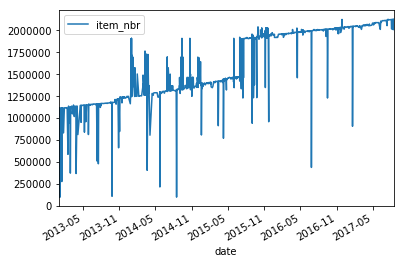

In [41]:
first_dates = pd.DataFrame(first_dates)
print(first_dates)
first_dates.reset_index(level=0,inplace=True)
first_dates.set_index(['date'],inplace=True)
print(first_dates)
first_dates.plot()
plt.show()

In [42]:
first_dates.loc["2016-12-31"]

,item_nbr
date,
2016-12-31,2042314


In [48]:
fair_items = first_dates.loc[first_dates.index < "2016-12-31"]


In [52]:
fair_items.reset_index(drop=True).to_csv("fair_items.csv")

In [54]:
train.loc[train["date"] > "2015-12-31"]

,item_nbr,date
66458908,105574,2016-01-01
66458909,105575,2016-01-01
66458910,105857,2016-01-01
66458911,108634,2016-01-01
66458912,108701,2016-01-01
66458913,108786,2016-01-01
66458914,108797,2016-01-01
66458915,108952,2016-01-01
66458916,111397,2016-01-01
66458917,114790,2016-01-01


In [19]:
test = pd.read_csv("../csv/test.csv")

In [20]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [21]:
test['date'].unique()

array(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
       '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
       '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'], dtype=object)

In [25]:
test['item_nbr'].unique().size

3901

In [30]:
test['store_nbr'].unique().size

54

In [39]:
test['store_nbr'].size / 16 / 3901 / 54

1.0

In [38]:
test[(test['item_nbr'] == test['item_nbr'][0]) & (test['store_nbr'] == test['store_nbr'][0])]

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
210654,125707694,2017-08-17,1,96995,False
421308,125918348,2017-08-18,1,96995,False
631962,126129002,2017-08-19,1,96995,False
842616,126339656,2017-08-20,1,96995,False
1053270,126550310,2017-08-21,1,96995,False
1263924,126760964,2017-08-22,1,96995,False
1474578,126971618,2017-08-23,1,96995,False
1685232,127182272,2017-08-24,1,96995,False
1895886,127392926,2017-08-25,1,96995,False


In [40]:
pd.read_csv("../csv/stores.csv")

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15
